In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import dateutil.relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date, station_id = session.query(Measurement.date, Measurement.station).order_by(Measurement.date.desc()).first()
f'Most recent date is on: {most_recent_date}'



'Most recent date is on: 2017-08-23'

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
d = dt.datetime.strptime(most_recent_date, "%Y-%m-%d")
d_minus_12m = d - dateutil.relativedelta.relativedelta(months=12) 
d_minus_12m

datetime.datetime(2016, 8, 23, 0, 0)

In [13]:
# Perform a query to retrieve the data and precipitation scores
begin_date = dt.date(2016, 8, 23)
sel = [Measurement.date,Measurement.prcp]
prcp_data = session.query(*sel).filter(Measurement.date >= dt.date(2016, 8, 23)).all()
prcp_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcp_data)
df.set_index(['date'], inplace=True)
df.head(3)

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08


In [19]:
# Sort the dataframe by date
df.sort_values(by='date', inplace=True)
df.head(3)

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79


<AxesSubplot:xlabel='date', ylabel='Inches'>

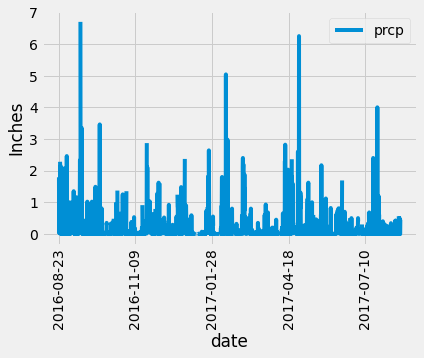

In [29]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(ylabel='Inches',rot=90)


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = df.describe()
summary_stats

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(func.count(Station.id)).first()
print(f'no of stations is {station_count[0]}')

no of stations is 9


In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)) \
.group_by(Measurement.station).all()
for i in most_active_stations:
    print(f' Station {i[0]} has {i[1]} measurements')


 Station USC00511918 has 1979 measurements
 Station USC00513117 has 2709 measurements
 Station USC00514830 has 2202 measurements
 Station USC00516128 has 2612 measurements
 Station USC00517948 has 1372 measurements
 Station USC00518838 has 511 measurements
 Station USC00519281 has 2772 measurements
 Station USC00519397 has 2724 measurements
 Station USC00519523 has 2669 measurements


In [32]:
# List the stations and the counts in descending order.
ordered_most_active_stations = session.query(Measurement.station, func.count(Measurement.station)) \
.group_by(Measurement.station).order_by(func.count().desc()).all()
for i in ordered_most_active_stations:
    print(f' Station {i[0]} has {i[1]} measurements')

 Station USC00519281 has 2772 measurements
 Station USC00519397 has 2724 measurements
 Station USC00513117 has 2709 measurements
 Station USC00519523 has 2669 measurements
 Station USC00516128 has 2612 measurements
 Station USC00514830 has 2202 measurements
 Station USC00511918 has 1979 measurements
 Station USC00517948 has 1372 measurements
 Station USC00518838 has 511 measurements


In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = 'USC00519281'
sel2 = [Measurement.station]

min_temp = session.query(*sel2, func.min(Measurement.tobs)).filter(Measurement.station == station_id).one()
max_temp = session.query(*sel2, func.max(Measurement.tobs)).filter(Measurement.station == station_id).one()
avg_temp = session.query(*sel2, func.avg(Measurement.tobs)).filter(Measurement.station == station_id).one()

print(f"lowest_temp = {min_temp[1]}")
print(f"highest_temp = {max_temp[1]}")
print(f"average_temp = {round(avg_temp[1],2)}")

lowest_temp = 54.0
highest_temp = 85.0
average_temp = 71.66


In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_id = 'USC00519281'
begin_date = dt.date(2016, 8, 23)
sel = [Measurement.station,Measurement.date,Measurement.tobs]
station_data = session.query(*sel).filter(Measurement.station == station_id).filter(Measurement.date >= dt.date(2016, 8, 23)).all()
station_data
station_dataDF = pd.DataFrame(station_data)
station_dataDF.head(3)

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0


Text(0.5, 0, 'Temperature')

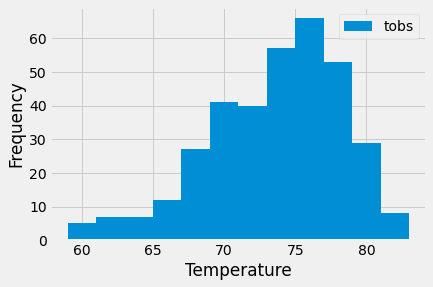

In [35]:
ax = station_dataDF.plot(kind='hist', bins=12)
ax.set_xlabel('Temperature')

# Close session

In [22]:
# Close Session
session.close()